# Spectractor tutorial

The goal of this notebook is to demonstrate the capabilities of the Spectractor pipeline.

In [1]:
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum
from spectractor import parameters

### Basic usage

The basic use of the extraction pipeline consists first to define: 
- the path to the fits image from which to extract the image, 
- the path of the output directory to save the extracted spectrum (created automatically if does not exist yet),
- the rough or exect position of the object in the image,
- the name of the disperser (as it is named in the `spectractor/extractor/dispersers/` folder),
- the name of the config .ini file,
- optionally the name of the target (to search for the extra-atmospheric spectrum if available).

In [2]:
filename="../tests/data/reduc_20170530_134.fits"
output_directory="./outputs/"
guess = [745,643]
disperser_label = "HoloAmAg"
config = "../config/ctio.ini"
target_label = "HD111980"

Then the spectrum is simply extracted from the image and saved in a new fits file using the command (it can take up to 5 minutes):

In [3]:
spectrum = Spectractor(filename, output_directory, guess=guess, target_label=target_label, disperser_label=disperser_label, config=config)

No rebinning: parameters.REBIN is forced to 1.


2022-03-29 10:48:53  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.
2022-03-29 10:48:53  astroquery _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.


Set header key DATE-OBS to 2017-05-31T02:53:52.356 from attr date_obs
Set header key EXPTIME to 120.0 from attr expo
Set header key AIRMASS to 1.131 from attr airmass
Set header key GRATING to HoloAmAg from attr disperser_label
Set header key UNIT2 to erg/s/cm$^2$/nm from attr units
Set header key ROTANGLE to -1.5649679886158248 from attr rotation_angle
Set header key DEC to -18.557716666666668 from attr dec
Set header key HA to 28.17883333333333 from attr hour_angle
Set header key OUTTEMP to 8.6 from attr temperature
Set header key OUTPRESS to 784.0 from attr pressure
Set header key OUTHUM to 25 from attr humidity
Set header key LBDA_REF to 704.8599983162577 from attr lambda_ref
Set header key PARANGLE to 119.80701879120896 from attr parallactic_angle


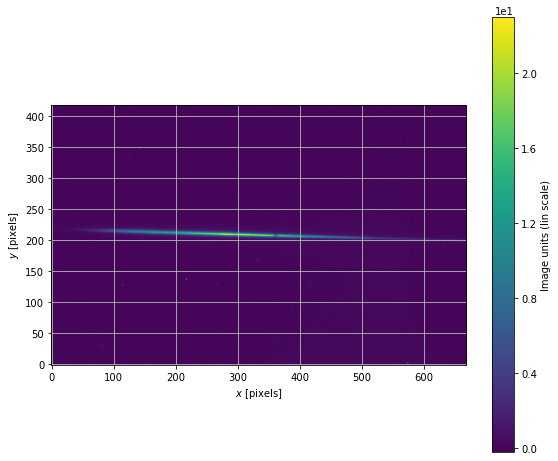

In [4]:
spectrum.plot_spectrogram()

### Advanced usage

#### Verbose and debug modes

The default usage of the Spectractor function only prints warning on the screen. The format of the logging message gives first the time of execution, the class involved, the class method involved, the logging level, and a message.

To show more details on the process followed by Spectractor, simply set VERBOSE variable to True. This also permit to plot the output spectrum on the screen:

2019-09-22 17:10:31  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2019-09-22 17:10:31  Image      load_CTIO_image      INFO   
	Loading CTIO image ../tests/data/reduc_20170530_134.fits...
2019-09-22 17:10:31  Image      load_CTIO_image      INFO   
	Image ../tests/data/reduc_20170530_134.fits loaded.
2019-09-22 17:10:31  Image      load_image           INFO   
	Loading disperser HoloAmAg...


Section: paths
x holo_dir: extractor/dispersers/	 => parameters.HOLO_DIR: /Users/jneveu/anaconda3/lib/python3.7/site-packages/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/CTIOThroughput/	 => parameters.THROUGHPUT_DIR: /Users/jneveu/anaconda3/lib/python3.7/site-packages/spectractor/simulation/CTIOThroughput/	 <class 'str'>
Section: instrument
x obs_name: CTIO	 => parameters.OBS_NAME: CTIO	 <class 'str'>
x obs_altitude: 2.200	 => parameters.OBS_ALTITUDE: 2.2	 <class 'float'>
x obs_latitude: -30 10 07.90	 => parameters.OBS_LATITUDE: -30 10 07.90	 <class 'str'>
x obs_diameter: 0.9	 => parameters.OBS_DIAMETER: 0.9 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	 => parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	 => parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	 => parameters.OBS_OBJECT_TYPE: STAR	 <class 'str'>
x obs_telescope_transmission: ctio_throughput.txt	 =>

2019-09-22 17:10:31  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_QUAL_2     SP_BIBCODE_2   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 111980 12 53 15.0528 -18 31 20.009 ...         C 1988MSS...C04....0H
2019-09-22 17:10:31  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image...


Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_001.fits
Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_003.fits
Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_002.fits


2019-09-22 17:10:38  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 2
Parameters:
            c0_0                 c1_0         ...          c1_1         
    ------------------- --------------------- ... ----------------------
    0.11165979833325694 0.0013999563147089062 ... 1.2335227323851393e-06
2019-09-22 17:10:41  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 2
Parameters:
            c0_0                c1_0         ...          c1_1        
    ------------------- -------------------- ... ---------------------
    0.02380140558564224 0.008713604934315743 ... 6.444794937084119e-06
2019-09-22 17:10:42  Image      find_target          INFO   
	X,Y target position in pixels: 743.665,683.058
2019-09-22 17:10:42  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.54 degree
2019-09-22

   Line   Tabulated  Detected ...   Amplitude       SNR      Chisq   
              nm        nm    ...                           reduced  
--------- --------- --------- ... -------------- --------- ----------
     $Fe$    430.79  427.7937 ... -2.2174477e-14 3.0442052  0.6648163
$H\alpha$     656.3 655.88403 ...  -3.284123e-14   5.93198  0.6887722
 $O_2(B)$   686.719  688.4316 ... -5.1294818e-14  9.265178  0.6887722
    $O_2$     762.1  762.0016 ... -1.6750681e-13 35.657494  0.2874246
  $H_2 O$     935.0 936.16376 ...  -1.341971e-14 3.4083235 0.11685273
  $H_2 O$     960.0  954.9504 ...  -6.966367e-14 17.693104 0.11685273


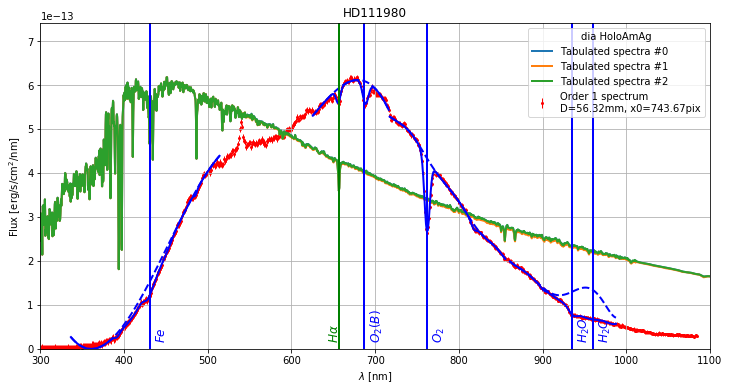

In [5]:
parameters.VERBOSE=True
Spectractor(filename, output_directory, guess=guess, target_label=target_label, disperser_label=disperser_label=disperser_label, config=config)

In case of a suspected bug, user can enter the DEBUG mode, that gives more plots and outputs to check where the code may do something wrong. Note that VERBOSE mode is included in the DEBUG mode.

In [6]:
parameters.DEBUG=True

#### Image and Spectrum classes

The Image and Spectrum classes have methods to load, save and plot images/spectra, and specific methods to extract the spectrum from the image. For instance, to load and plot the output spectrum, one can use:

2019-09-22 17:12:34  Star       load                 INFO   
	Simbad:  MAIN_ID        RA           DEC      ... SP_QUAL_3     SP_BIBCODE_3   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 111980 12 53 15.0528 -18 31 20.009 ...         C 1988MSS...C04....0H
2019-09-22 17:12:34  Spectrum   load_spectrum        INFO   
	Loading disperser HoloAmAg...
2019-09-22 17:12:34  Spectrum   load_spectrum        INFO   
	Spectrum loaded from ./outputs/reduc_20170530_134_spectrum.fits
2019-09-22 17:12:34  Spectrum   load_spectrogram     INFO   
	Spectrogram loaded from ./outputs/reduc_20170530_134_spectrogram.fits
2019-09-22 17:12:34  Spectrum   load_chromatic_psf   INFO   
	Spectrogram loaded from ./outputs/reduc_20170530_134_table.csv


Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_001.fits
Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_003.fits
Loading /Users/jneveu/Documents/LSST/Calibration/CDBS/calspec/hd111980_stis_002.fits
Load disperser HoloAmAg:
	from /Users/jneveu/anaconda3/lib/python3.7/site-packages/spectractor/extractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.00 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)


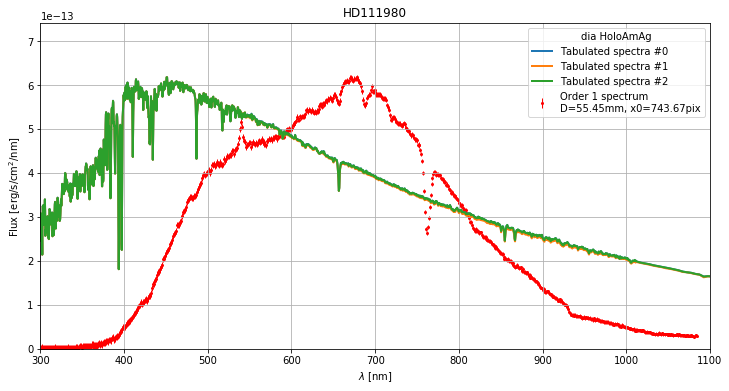

In [7]:
spec = Spectrum('./outputs/reduc_20170530_134_spectrum.fits')
spec.plot_spectrum()

#### Spectractor settings

Some settings parameters are defined in the XWINDOW python file. For instance the half-width (in pixel) of the search windows to find the object in the images are set by:

In [8]:
print('Width of search window along X in pixels:',parameters.XWINDOW)
print('Width of search window along Y in pixels:',parameters.YWINDOW)

Width of search window along X in pixels: 100
Width of search window along Y in pixels: 100


and in the rotated images by:

In [9]:
print('Width of search window along X in pixels:',parameters.XWINDOW_ROT)
print('Width of search window along Y in pixels:',parameters.YWINDOW_ROT)

Width of search window along X in pixels: 50
Width of search window along Y in pixels: 50


The edges of the output spectrum are floats specified by the LAMBDA_MIN and LAMBDA_MAX parameters (in nanometers):

In [10]:
print('Minimum wavelenght:',parameters.LAMBDA_MIN,'nm')
print('Maximum wavelenght:',parameters.LAMBDA_MAX,'nm')

Minimum wavelenght: 300 nm
Maximum wavelenght: 1100 nm


## Simulation

## Fit